In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# pip install plotly

In [2]:
# Reading the extracted csv files
df1 = pd.read_csv("Datasets/Auto_stock_data.csv")
df2 = pd.read_csv("Datasets/Financial_stock_data.csv")
df3 = pd.read_csv("Datasets/tech_data.csv").drop(columns={'Unnamed: 0'})
df4 = pd.read_csv("Datasets/Healthcare_Stock_Data2.csv")

In [3]:
# Convert the date column to datetime format in df4
df4['date'] = pd.to_datetime(df4['date'], format='%m/%d/%Y')
df4 = df4.rename(columns={'date':"Date",'1. open': "Open", '2. high': "High", '3. low': "Low", '4. close': "Close", '5. volume':"Volume"})

In [4]:
# Concating all the dataframes
combined_df = pd.concat([df1, df2, df3,df4], ignore_index=True)

In [5]:
#Converting the date column to datetime format in the final combined dataframe
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.dtypes

Date        datetime64[ns]
Ticker              object
Sector              object
Industry            object
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
dtype: object

In [6]:
# Creating a new column 'Year'
combined_df['Year'] = combined_df['Date'].dt.year
combined_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume,Year
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.19,43.60,860740.0,2018
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.20,43.39,1152481.0,2018
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.30,43.74,1164240.0,2018
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.03,43.53,922916.0,2018
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.28,43.55,1254075.0,2018
...,...,...,...,...,...,...,...,...,...,...
114456,2023-11-22,MRK,Healthcare,Drug Manufacturers,102.20,102.6800,101.11,101.68,5724130.0,2023
114457,2023-11-24,MRK,Healthcare,Drug Manufacturers,102.26,102.5136,101.44,101.87,3167952.0,2023
114458,2023-11-27,MRK,Healthcare,Drug Manufacturers,101.91,102.1500,100.70,101.43,7356536.0,2023
114459,2023-11-28,MRK,Healthcare,Drug Manufacturers,101.31,101.3500,100.01,100.18,8738483.0,2023


In [7]:
# Group the combined dataframe by Year and Sector on Average Volumne
grouped_df = combined_df.groupby(['Year', 'Sector'])['Volume'].mean().reset_index()

In [8]:
pivot_data = grouped_df.pivot(index='Year', columns='Sector', values='Volume').reset_index()

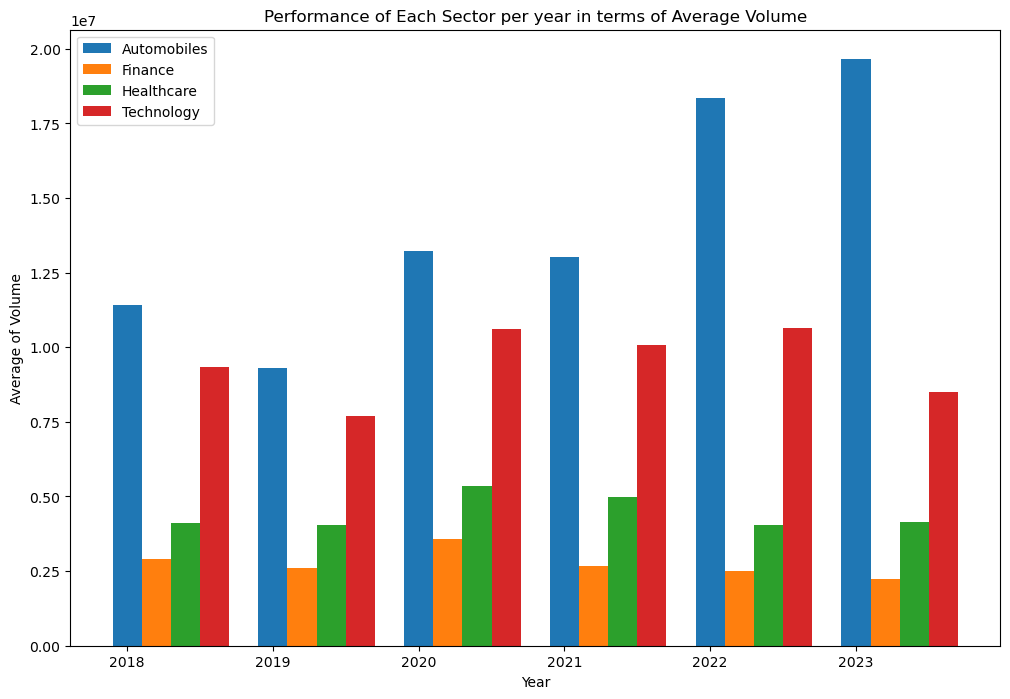

In [9]:
# Plot the chart

plt.figure(figsize=(12, 8))
bar_width = 0.2  # Width of each bar

for i, sector in enumerate(grouped_df['Sector'].unique()):
    plt.bar(pivot_data['Year'] + i * bar_width, pivot_data[sector], width=bar_width, label=sector)

plt.xlabel('Year')
plt.ylabel('Average of Volume')
plt.title('Performance of Each Sector per year in terms of Average Volume')
plt.legend()
plt.savefig("year_wise_sector_performance.png")

In [10]:
# # Create a bar graph with hover functionality using plotly express
# fig = px.bar(
#     grouped_df,
#     x='Year',
#     y='Volume',
#     color='Sector',
#     labels={'Volume': 'Average Volume'},
#     title='Performance of Each Sector per Year in terms of Average Volume',
#     height=500,
# )

# # Add hover data
# fig.update_traces(
#     hovertemplate='<b>%{y}</b> Volume<br>%{x} Year'
# )

# # Show the plot
# fig.show()
# fig.write_image("graph.png")